In [1]:
import data_loader
import data_visual
import data_analyze

In [3]:
"""
dataset from https://www.kaggle.com/datasets/marshuu/cancer-rate-before-and-after-chernobyl
"""
file_path = "cancer_before_and_after_Chernobyl_Belarus.csv"

In [5]:
try:
    data = data_loader.load_data(file_path) # 1. Создайте модуль data_loader для загрузки данных из различных источников (CSV, JSON, API)
    print("Чтение файла прошло успешно")
except FileNotFoundError:
    print("Файл не найден")
except Exception as e:
    print(f"Произошла ошибка: {e}")
finally:
    print(data)

Чтение файла прошло успешно
    year    sex location cancer_type  cases
0   1985  women    Gomel        skin   17.3
1   1985  women  Mogilev        skin   16.8
2   1986  women    Gomel        skin   15.6
3   1986  women  Mogilev        skin   18.3
4   1985  women  Belarus        skin   14.9
..   ...    ...      ...         ...    ...
79  1985    men  Mogilev      kidney    3.1
80  1986    men    Gomel      kidney    6.3
81  1986    men  Mogilev      kidney    6.8
82  1985    men  Belarus      kidney    3.5
83  1986    men  Belarus      kidney    7.5

[84 rows x 5 columns]


In [7]:
is_null = data_analyze.check_data(data)
is_null.sum()

year           0
sex            0
location       0
cancer_type    0
cases          0
dtype: int64

In [9]:
# т.к. найденный датасет не имеет пропусков, копируем его и делаем пропуски принудительно
try:
    data_copy = data.copy() 
    data_copy.loc[data_copy.index[-1]+1] = {'year':1986, 'sex':'women', 'location':'Minsk', 'cancer_type':'skin', 'cases':None}
    print("Пропуски добавлены успешно")
except Exception as e:
    print(f"Произошла ошибка: {e}")
finally:
    print(data_copy)

Пропуски добавлены успешно
    year    sex location cancer_type  cases
0   1985  women    Gomel        skin   17.3
1   1985  women  Mogilev        skin   16.8
2   1986  women    Gomel        skin   15.6
3   1986  women  Mogilev        skin   18.3
4   1985  women  Belarus        skin   14.9
..   ...    ...      ...         ...    ...
80  1986    men    Gomel      kidney    6.3
81  1986    men  Mogilev      kidney    6.8
82  1985    men  Belarus      kidney    3.5
83  1986    men  Belarus      kidney    7.5
84  1986  women    Minsk        skin    NaN

[85 rows x 5 columns]


C:\Users\Mskaf\AppData\Local\Temp\ipykernel_85252\2190680416.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_copy.loc[data_copy.index[-1]+1] = {'year':1986, 'sex':'women', 'location':'Minsk', 'cancer_type':'skin', 'cases':None}


In [11]:
is_null = data_analyze.check_data(data_copy)
is_null.sum()

year           0
sex            0
location       0
cancer_type    0
cases          1
dtype: int64

In [13]:
try:
    data_copy = data_analyze.set_missing_values(data_copy, data_copy.cases, 'mean') # заполняем средним значением по столбцу
    print("Пропуски заполнены средним значением по столбцу успешно")
except Exception as e:
    print(f"Произошла ошибка: {e}")  
finally:
    print("Блок по заполнению пропусков завершен")
    print(data_copy)

Пропуски заполнены средним значением по столбцу успешно
Блок по заполнению пропусков завершен
    year    sex location cancer_type      cases
0   1985  women    Gomel        skin  17.300000
1   1985  women  Mogilev        skin  16.800000
2   1986  women    Gomel        skin  15.600000
3   1986  women  Mogilev        skin  18.300000
4   1985  women  Belarus        skin  14.900000
..   ...    ...      ...         ...        ...
80  1986    men    Gomel      kidney   6.300000
81  1986    men  Mogilev      kidney   6.800000
82  1985    men  Belarus      kidney   3.500000
83  1986    men  Belarus      kidney   7.500000
84  1986  women    Minsk        skin  10.688095

[85 rows x 5 columns]


In [15]:
try:
    data_copy.loc[data_copy.index[-1]+1] = {'year':1985, 'sex':'women', 'location':'Minsk', 'cancer_type':'skin', 'cases':None}
except Exception as e:
    print(f"Произошла ошибка: {e}")
finally:
    print(data_copy)

    year    sex location cancer_type      cases
0   1985  women    Gomel        skin  17.300000
1   1985  women  Mogilev        skin  16.800000
2   1986  women    Gomel        skin  15.600000
3   1986  women  Mogilev        skin  18.300000
4   1985  women  Belarus        skin  14.900000
..   ...    ...      ...         ...        ...
81  1986    men  Mogilev      kidney   6.800000
82  1985    men  Belarus      kidney   3.500000
83  1986    men  Belarus      kidney   7.500000
84  1986  women    Minsk        skin  10.688095
85  1985  women    Minsk        skin        NaN

[86 rows x 5 columns]


C:\Users\Mskaf\AppData\Local\Temp\ipykernel_85252\3610733985.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data_copy.loc[data_copy.index[-1]+1] = {'year':1985, 'sex':'women', 'location':'Minsk', 'cancer_type':'skin', 'cases':None}


In [17]:
try:
    data_copy = data_analyze.set_missing_values(data_copy, data_copy.cases, 'median') # заполняем медианным значением по столбцу
    print("Пропуски заполнены медианным значением по столбцу успешно")
except Exception as e:
    print(f"Произошла ошибка: {e}") 
finally:
    print(data_copy)

Пропуски заполнены медианным значением по столбцу успешно
    year    sex location cancer_type      cases
0   1985  women    Gomel        skin  17.300000
1   1985  women  Mogilev        skin  16.800000
2   1986  women    Gomel        skin  15.600000
3   1986  women  Mogilev        skin  18.300000
4   1985  women  Belarus        skin  14.900000
..   ...    ...      ...         ...        ...
81  1986    men  Mogilev      kidney   6.800000
82  1985    men  Belarus      kidney   3.500000
83  1986    men  Belarus      kidney   7.500000
84  1986  women    Minsk        skin  10.688095
85  1985  women    Minsk        skin   6.400000

[86 rows x 5 columns]


In [19]:
try:
    data_copy.loc[data_copy.index[-1]+1] = {'year':1986, 'sex':None, 'location':'Minsk', 'cancer_type':'skin', 'cases':1.1}
except Exception as e:
    print(f"Произошла ошибка: {e}")
finally:
    print(data_copy)

    year    sex location cancer_type      cases
0   1985  women    Gomel        skin  17.300000
1   1985  women  Mogilev        skin  16.800000
2   1986  women    Gomel        skin  15.600000
3   1986  women  Mogilev        skin  18.300000
4   1985  women  Belarus        skin  14.900000
..   ...    ...      ...         ...        ...
82  1985    men  Belarus      kidney   3.500000
83  1986    men  Belarus      kidney   7.500000
84  1986  women    Minsk        skin  10.688095
85  1985  women    Minsk        skin   6.400000
86  1986   None    Minsk        skin   1.100000

[87 rows x 5 columns]


In [21]:
try:
    data_copy = data_analyze.set_missing_values(data_copy, data_copy.cases, 'delete') # строки с пропусками удаляем 
    print("Строки с пропусками удалены успешно")
except Exception as e:
    print(f"Произошла ошибка: {e}") 
finally:
    print(data_copy)

Строки с пропусками удалены успешно
    year    sex location cancer_type      cases
0   1985  women    Gomel        skin  17.300000
1   1985  women  Mogilev        skin  16.800000
2   1986  women    Gomel        skin  15.600000
3   1986  women  Mogilev        skin  18.300000
4   1985  women  Belarus        skin  14.900000
..   ...    ...      ...         ...        ...
81  1986    men  Mogilev      kidney   6.800000
82  1985    men  Belarus      kidney   3.500000
83  1986    men  Belarus      kidney   7.500000
84  1986  women    Minsk        skin  10.688095
85  1985  women    Minsk        skin   6.400000

[86 rows x 5 columns]


In [23]:
try:
    data_copy = data_analyze.set_missing_values(data_copy, data_copy.cases, '123') # строки с пропусками удаляем 
except Exception as e:
    print(f"Произошла ошибка: {e}")
else:
    print("Неизвестный метод сработал")
finally:
    print("Блок по работе с пропусками завершен")
    print(data_copy)

Произошла ошибка: Метод должен быть 'mean', 'median', or 'delete'
Блок по работе с пропусками завершен
    year    sex location cancer_type      cases
0   1985  women    Gomel        skin  17.300000
1   1985  women  Mogilev        skin  16.800000
2   1986  women    Gomel        skin  15.600000
3   1986  women  Mogilev        skin  18.300000
4   1985  women  Belarus        skin  14.900000
..   ...    ...      ...         ...        ...
81  1986    men  Mogilev      kidney   6.800000
82  1985    men  Belarus      kidney   3.500000
83  1986    men  Belarus      kidney   7.500000
84  1986  women    Minsk        skin  10.688095
85  1985  women    Minsk        skin   6.400000

[86 rows x 5 columns]


<Figure size 1000x600 with 0 Axes>

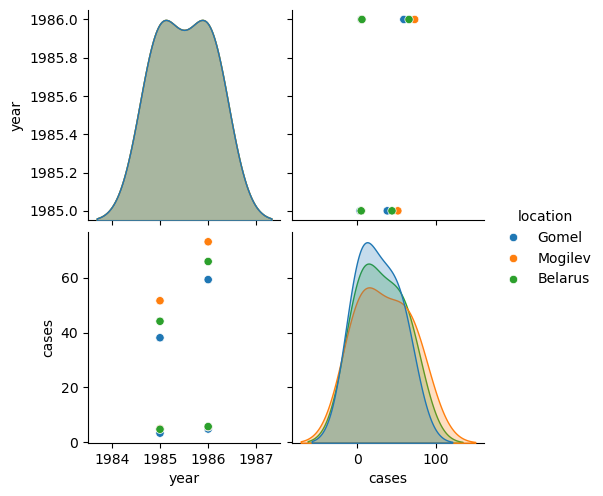

Построение парных графиков при помощи sns отработало
Построение парных графиков завершено


In [25]:
try:
    figure_pairplot = data_visual.add_pairplot(data, 'location', 'lungs')
except Exception as e:
    print(f"Произошла ошибка: {e}")
else:
    print("Построение парных графиков при помощи sns отработало")
finally:
    print("Построение парных графиков завершено")

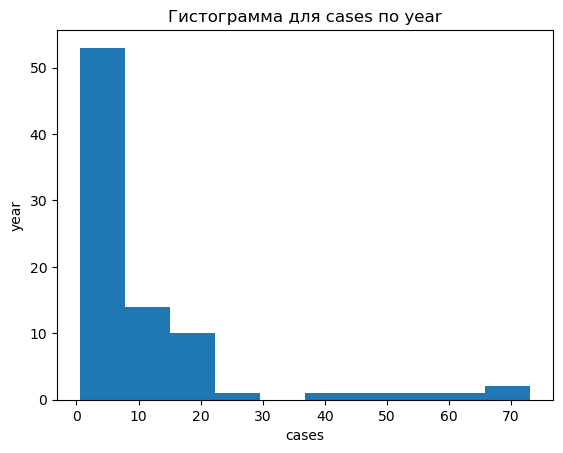

Построение гистограммы отработало
Построение гистограммы завершено


In [43]:
try:
    figure_histogram = data_visual.add_histogram(data, 'cases')
except Exception as e:
    print(f"Произошла ошибка: {e}")
else:
    print("Построение гистограммы отработало")
finally:
    print("Построение гистограммы завершено")



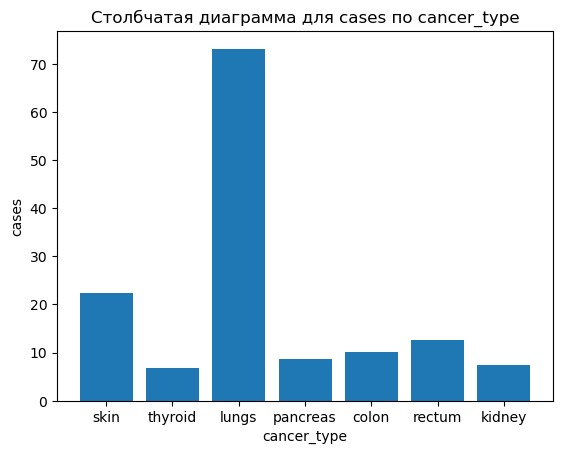

Построение гистограммы отработало
Построение гистограммы завершено


In [67]:
try:
    figure_histogram = data_visual.add_line_plot(data, 'cancer_type', 'cases')
except Exception as e:
    print(f"Произошла ошибка: {e}")
else:
    print("Построение гистограммы отработало")
finally:
    print("Построение гистограммы завершено")

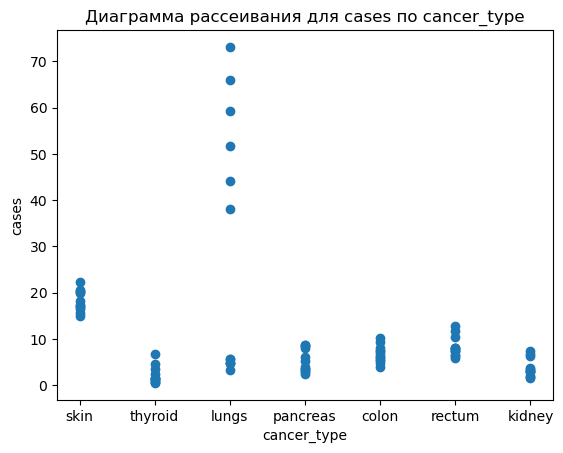

Построение гистограммы отработало
Построение гистограммы завершено


In [31]:
try:
    figure_histogram = data_visual.add_scatter_plot(data, 'cancer_type', 'cases')
except Exception as e:
    print(f"Произошла ошибка: {e}")
else:
    print("Построение гистограммы отработало")
finally:
    print("Построение гистограммы завершено")